# Kronecker Decomposition of the QFT of Statevector: 

### Concise representation: 
In order to design QFT circuit for $QFT \vert j \rangle$, we need to have Kronecker decomposition of $QFT \vert j \rangle$. 

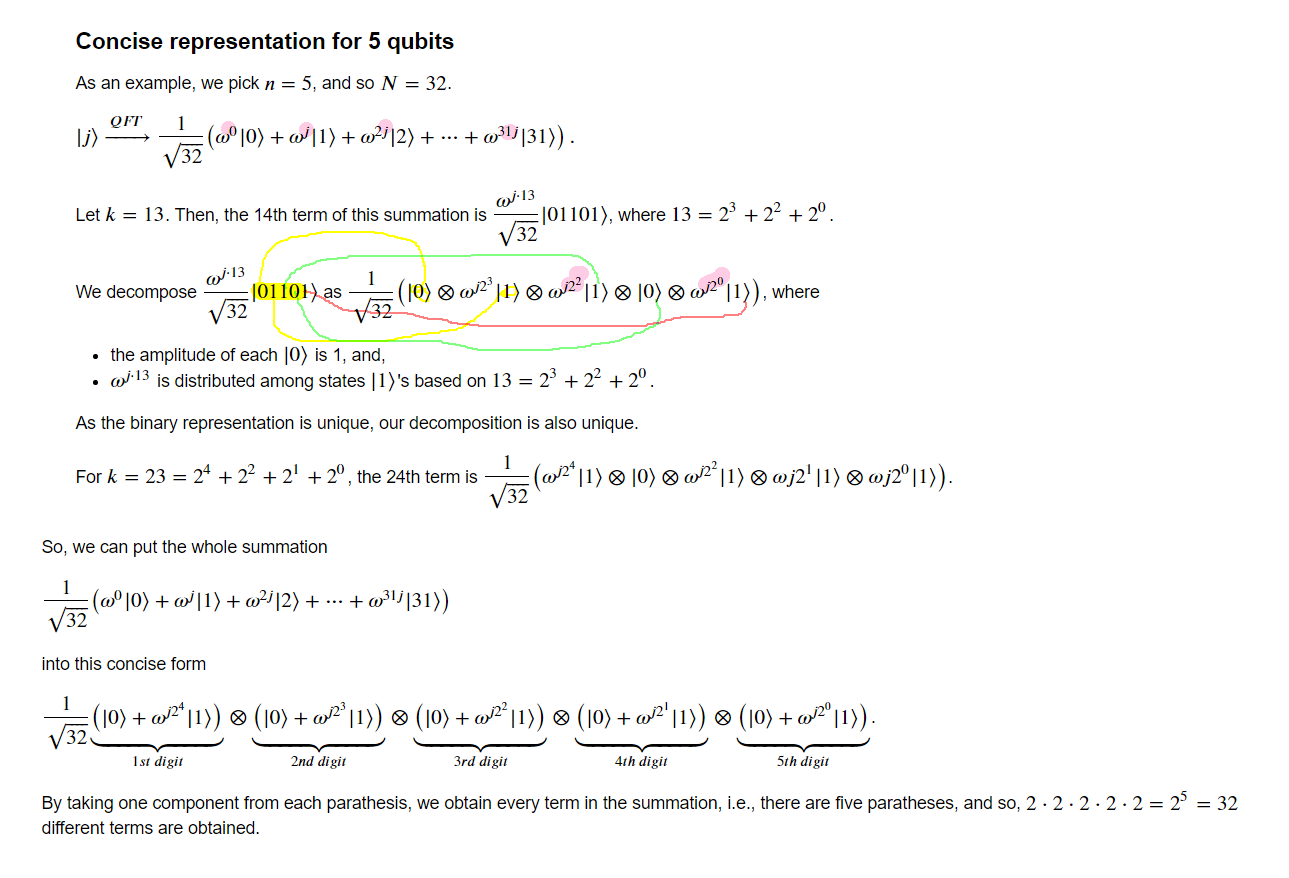

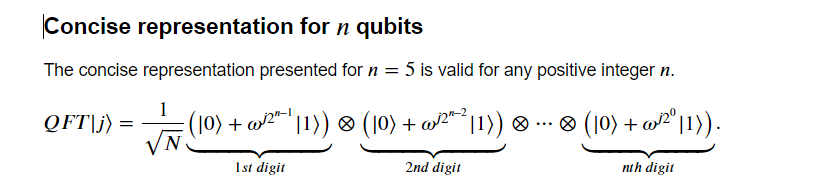

Write a program to generate Kronecker decomposition of give state $QFT \vert k \rangle$ in latex. 

In [30]:
import numpy as np 
import math, cmath 
from qiskit.visualization import array_to_latex
from IPython.display import display, Markdown

In [1]:
def qft_compute(sv_entries_count, precision=-1):
    import numpy as np 
    import cmath
    dim = sv_entries_count
    qft_matrix = np.zeros((sv_entries_count,sv_entries_count), dtype=complex)

    for i in range(dim): 
        for j in range(dim): 
            qft_matrix[i][j] = 1.0/cmath.sqrt(sv_entries_count) * cmath.exp( 2*cmath.pi*1j*i*j / sv_entries_count)      
    
    if precision != -1:
        qft_matrix = np.around(qft_matrix,precision)
        
    return qft_matrix


In [91]:

def kron_decompose_render(label=1):
    
    if label >=1024: return "Error max qubits reached"
    if label <0: return "Error label can't be negative"
    
    vec = np.array(list("{0:b}".format(label)) ).astype(int)
    vec.reshape(len(vec),1)

    num_qb = 0
    N = 0
    j_ket = None

    if label == 0 or label == 1:
        num_qb = 1
    else: 
        num_qb = len(vec) #int( np.floor( np.log2(state_label) ) + 1 )
    
    N = 2**num_qb
    
    print("Number of Qubits required in QFT Circuit: ", num_qb)
    print("Binary of |", label, "> = |", "{0:b}".format(label), ">")
    
    ## General Form:
    gen_eq = r"$QFT = \frac{{1}}{{\sqrt{{{N}}}}} ".format(N=N)
    
    for i in range(1,num_qb+1):
        if vec[i-1]==1:
            gen_eq = gen_eq + r'\begin{{bmatrix}} 1 \\ \omega^{{ j . 2^{N} }} \end{{bmatrix}}'.format(N=num_qb-i)
            if i != num_qb:
                gen_eq = gen_eq + r' \otimes '
    gen_eq = gen_eq + r'$'
    
    ## Specific Form:
    sp_eq = r"$QFT = \frac{{1}}{{\sqrt{{{N}}}}} ".format(N=N)
    
    for i in range(1,num_qb+1):
        if vec[i-1]==1:
            sp_eq = sp_eq + r'\begin{{bmatrix}} 1 \\ \omega^{{ {J} . 2^{N} }} \end{{bmatrix}}'.format(J=label,N=num_qb-i)
            if i != num_qb:
                sp_eq = sp_eq + r' \otimes '
    sp_eq = sp_eq + r'$'
    
    
    ## Computed:
    comp_eq = r"$QFT = \frac{{1}}{{\sqrt{{{N}}}}} ".format(N=N)
    
    exponent = (2*1j*cmath.pi*label)/N
    
    for i in range(1,num_qb+1):
        if vec[i-1]==1:
            phase = cmath.exp(exponent * 2**(num_qb-i))
        
            x = np.array([[1],[phase]])
        
            comp_eq = comp_eq + array_to_latex(x, max_size=(20,20), source=True)

            if i != num_qb:
                comp_eq = comp_eq + r' \otimes '
    
    comp_eq = comp_eq + r'$'
    
    display(Markdown(gen_eq))
    print()
    display(Markdown(sp_eq))
    print()
    display(Markdown(comp_eq))
    return comp_eq
    

In [100]:
t = kron_decompose_render(139)

Number of Qubits required in QFT Circuit:  8
Binary of | 139 > = | 10001011 >


$QFT = \frac{1}{\sqrt{256}} \begin{bmatrix} 1 \\ \omega^{ j . 2^7 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ j . 2^3 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ j . 2^1 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ j . 2^0 } \end{bmatrix}$

$QFT = \frac{1}{\sqrt{256}} \begin{bmatrix} 1 \\ \omega^{ 139 . 2^7 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ 139 . 2^3 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ 139 . 2^1 } \end{bmatrix} \otimes \begin{bmatrix} 1 \\ \omega^{ 139 . 2^0 } \end{bmatrix}$

$QFT = \frac{1}{\sqrt{256}} 

\begin{bmatrix}
1  \\
 -1  \\
 \end{bmatrix}
 \otimes 

\begin{bmatrix}
1  \\
 -0.55557 + 0.83147i  \\
 \end{bmatrix}
 \otimes 

\begin{bmatrix}
1  \\
 0.85773 + 0.5141i  \\
 \end{bmatrix}
 \otimes 

\begin{bmatrix}
1  \\
 -0.96378 - 0.26671i  \\
 \end{bmatrix}
$

In [93]:
aa = 5
xx = 0
qb = 4
display(Markdown(array_to_latex(np.array([[1],[cmath.exp(2*1j*cmath.pi*aa*(2**xx)/(2**qb))]]), max_size=(20,20), source=True)))



\begin{bmatrix}
1  \\
 -0.38268 + 0.92388i  \\
 \end{bmatrix}
